In [1]:
## from urllib.request import urlretrieve
## urlretrieve("https://raw.githubusercontent.com/dompazz/FinTech590-RiskManagement/main/Week06/Project/AAPL_Options.csv", "AAPL_Options.csv")

In [2]:
## from urllib.request import urlretrieve
## urlretrieve("https://raw.githubusercontent.com/dompazz/FinTech590-RiskManagement/main/Week06/Project/DailyReturn.csv", "DailyReturn.csv")

In [3]:
## from urllib.request import urlretrieve
## urlretrieve("https://raw.githubusercontent.com/dompazz/FinTech590-RiskManagement/main/Week06/Project/problem3.csv", "problem3.csv")

# Problem 1

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import argparse
from numpy import linalg as LA
import scipy.stats as st
from scipy.optimize import minimize
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing

In [5]:
## Import data
Current_Stock = 165
RF = 0.0025
CCR = 0.0053
b = RF - CCR

In [6]:
## Import and Calculate Date
from datetime import date
Current_Date = date(2022, 2, 25)
OED = date(2022, 3, 18)
Delta = OED - Current_Date
Days = Delta.days
Days

21

In [7]:
TTM = Days / 365
TTM

0.057534246575342465

In [8]:
## GBSM Function
def gbsm(met, underlying, strike, ttm, rf, b, ivol):
    d1 = (np.log(underlying / strike) + (b + 0.5 * ivol ** 2) * ttm) / (ivol * np.sqrt(ttm))
    d2 = (np.log(underlying / strike) + (b - 0.5 * ivol ** 2) * ttm) / (ivol * np.sqrt(ttm))
    if met == 'call':
        Return = (underlying * np.exp((b - rf) * ttm) * si.norm.cdf(d1, 0.0, 1.0) - strike * np.exp(-rf * ttm) * si.norm.cdf(d2, 0.0, 1.0))
    elif met == 'put':
        Return = (strike * np.exp(-rf * ttm) * si.norm.cdf(-d2, 0.0, 1.0) - underlying * np.exp((b - rf) * ttm) * si.norm.cdf(-d1, 0.0, 1.0))
    return Return

In [9]:
## Function Test
ttm = 125 / 255
call_val = gbsm('call', 100, 100, ttm, 0.05, 0.05, 0.2)
put_val = gbsm('put', 100, 100, ttm, 0.05, 0.05, 0.2)
print(call_val, put_val)

6.808882020677991 4.38769425280735


In [10]:
## Implied Volatilities between 10% and 80%
strike = 160
impliedVol = np.arange(0.1, 0.9, 0.1)
callPrice = []
putPrice = []
for x in np.nditer(impliedVol):
    ivol = x 
    callPrice.append(gbsm('call', Current_Stock, strike, TTM, RF, b, ivol))
    putPrice.append(gbsm('put', Current_Stock, strike, TTM, RF, b, ivol))

In [11]:
callPrice

[5.15927384199685,
 6.207430649543056,
 7.564676490631797,
 9.015949122714233,
 10.506222433004197,
 12.015758999491496,
 13.535731959750834,
 15.06155201335335]

Text(0.5, 1.0, 'Call price')

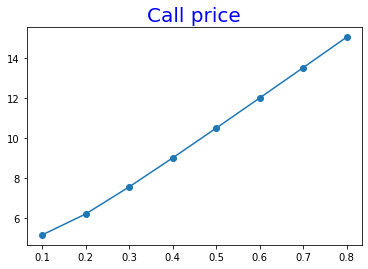

In [12]:
## Plot Call Option Price
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
y = callPrice
plt.plot(x, y ,marker="o")
plt.title('Call price',fontsize=20, color = 'blue')

Text(0.5, 1.0, 'Put price')

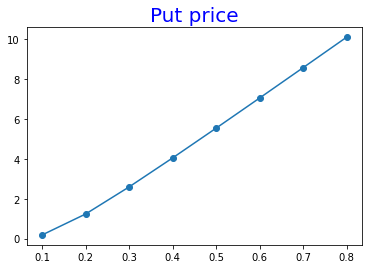

In [13]:
## Plot Put Option Price
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
y = putPrice
plt.plot(x, y ,marker="o")
plt.title('Put price',fontsize=20, color = 'blue')

Text(0.5, 1.0, 'Call & Put Price')

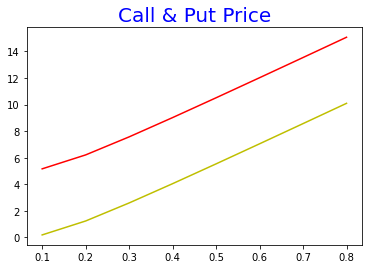

In [14]:
## Compare plot
plt.plot(x,callPrice, "r-")
plt.plot(x,putPrice, "y-")
plt.title('Call & Put Price',fontsize=20, color = 'blue')

# Problem 2

In [15]:
AAPL = pd.read_csv("AAPL_Options.csv")
AAPL

,Stock,Expiration,Type,Strike,Last Price
0,AAPL,3/18/2022,Call,135.0,30.175
1,AAPL,3/18/2022,Call,140.0,25.300
2,AAPL,3/18/2022,Call,145.0,20.525
3,AAPL,3/18/2022,Call,150.0,15.850
4,AAPL,3/18/2022,Call,155.0,11.525
5,AAPL,3/18/2022,Call,160.0,7.525
6,AAPL,3/18/2022,Call,165.0,4.225
7,AAPL,3/18/2022,Call,170.0,1.935
8,AAPL,3/18/2022,Call,175.0,0.715
9,AAPL,3/18/2022,Call,180.0,0.260


In [16]:
## GBSM Function
def gbsm1(met, underlying, strike, ttm, rf, b, ivol):
    Return1 = 0
    d1 = (np.log(underlying / strike) + (b + 0.5 * ivol ** 2) * ttm) / (ivol * np.sqrt(ttm))
    d2 = (np.log(underlying / strike) + (b - 0.5 * ivol ** 2) * ttm) / (ivol * np.sqrt(ttm))
    if met == 'Call':
        Return1 = (underlying * np.exp((b - rf) * ttm) * si.norm.cdf(d1, 0.0, 1.0) - strike * np.exp(-rf * ttm) * si.norm.cdf(d2, 0.0, 1.0))
    elif met == 'Put':
        Return1 = (strike * np.exp(-rf * ttm) * si.norm.cdf(-d2, 0.0, 1.0) - underlying * np.exp((b - rf) * ttm) * si.norm.cdf(-d1, 0.0, 1.0))
    return Return1

In [17]:
def Vol(spot_price: float,
        strike_price: float,
        time_to_maturity: float,
        rf,
        b,
        option_type: str,
        option_price: float):
    volatility = 2.5
    upper_range = 5.0
    lower_range = 0
    MOE = 0.000001
    max_iters = 10000
    iter = 0

    while iter < max_iters: # Don't iterate too much
        price = gbsm1(met = option_type,
                     underlying = spot_price,
                     strike = strike_price,
                     ttm = time_to_maturity,
                     rf = rf,
                     b = b,
                     ivol = volatility) 
        if abs((price - option_price)/option_price) < MOE:
            return volatility

        if price > option_price:
            tmp = volatility
            volatility = (volatility + lower_range)/2
            upper_range = tmp
        elif price < option_price:
            tmp = volatility
            volatility = (volatility + upper_range)/2
            lower_range = tmp
        iter += 1
    return volatility

In [18]:
## Import and Calculate Date
from datetime import date
Current_Date = date(2022, 2, 25)
OED = date(2022, 3, 18)
Delta = OED - Current_Date
Days = Delta.days
TTM = Days / 365
## Calculate Implied Volatilities
VOL = []
Current_AAPL = 164.85
RF = 0.0025
CCR = 0.0053
b = RF - CCR
nrows = len(AAPL.index)
i = 0
for i in range(0, nrows):
    strike_price = AAPL.iloc[i][3]
    option_type = AAPL.iloc[i][2]
    option_price = AAPL.iloc[i][4]
    VOL.append(Vol(Current_AAPL, strike_price, TTM, RF, b, option_type, option_price))
    i = i + 1

In [19]:
## Split Call and Put
VOL_Call = VOL[0:14]
VOL_Put = VOL[14:27]

In [20]:
## Strike price
STP_Call = AAPL['Strike'][0:14]
STP_Put = AAPL['Strike'][14:27]

Text(0.5, 1.0, 'Volatility VS Strike Price')

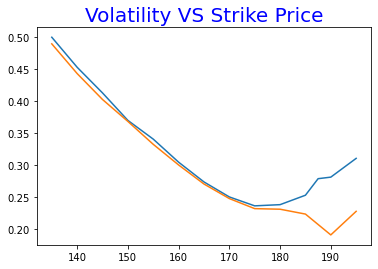

In [21]:
plt.plot(STP_Call,VOL_Call)
plt.plot(STP_Put, VOL_Put)
plt.title('Volatility VS Strike Price',fontsize=20, color = 'blue')

# Problem 3

In [22]:
DailyReturn = pd.read_csv("DailyReturn.csv")

In [23]:
df3 = pd.read_csv("problem3.csv")
df3

,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice
0,Straddle,Option,AAPL,1,Call,3/18/2022,165.0,4.50
1,Straddle,Option,AAPL,1,Put,3/18/2022,165.0,4.40
2,SynLong,Option,AAPL,1,Call,3/18/2022,165.0,4.50
3,SynLong,Option,AAPL,-1,Put,3/18/2022,165.0,4.40
4,CallSpread,Option,AAPL,1,Call,3/18/2022,165.0,4.50
5,CallSpread,Option,AAPL,-1,Call,3/18/2022,175.0,0.72
6,PutSpread,Option,AAPL,1,Put,3/18/2022,165.0,4.40
7,PutSpread,Option,AAPL,-1,Put,3/18/2022,155.0,1.60
8,Stock,Stock,AAPL,1,NaN,NaN,NaN,164.85
9,Call,Option,AAPL,1,Call,3/18/2022,165.0,4.50


In [24]:
RF = 0.0025
CCR = 0.0053
b = RF - CCR
Current_AAPL = 164.85
Current_Date = date(2022, 2, 25)
OED = date(2022, 3, 18)
Delta = OED - Current_Date
Days = Delta.days
TTM = Days / 365

In [25]:
## Calculate Implied Volatilities
VOL2 = []
nrows = len(df3.index)
i = 0
for i in range(0, nrows):
    strike_price = df3.iloc[i][6]
    option_type = df3.iloc[i][4]
    option_price = df3.iloc[i][7]
    TYPE = df3.iloc[i][1]
    if TYPE == 'Stock':
        VOL2.append(None)
    else:
         VOL2.append(Vol(Current_AAPL, strike_price, TTM, RF, b, option_type, option_price))
    i = i + 1

In [26]:
## Add Volatilities to Dataframe
df3['Im Vol'] = VOL2
df3

,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice,Im Vol
0,Straddle,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819
1,Straddle,Option,AAPL,1,Put,3/18/2022,165.0,4.40,0.273281
2,SynLong,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819
3,SynLong,Option,AAPL,-1,Put,3/18/2022,165.0,4.40,0.273281
4,CallSpread,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819
5,CallSpread,Option,AAPL,-1,Call,3/18/2022,175.0,0.72,0.236476
6,PutSpread,Option,AAPL,1,Put,3/18/2022,165.0,4.40,0.273281
7,PutSpread,Option,AAPL,-1,Put,3/18/2022,155.0,1.60,0.331380
8,Stock,Stock,AAPL,1,NaN,NaN,NaN,164.85,NaN
9,Call,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819


In [27]:
## Value of Option 
Range = np.arange(155, 175, 1)
Value = []
for x in np.nditer(Range):
    for i in range(0, nrows):
        strike_price = df3.iloc[i][6]
        current_price = df3.iloc[i][7]
        option_type = df3.iloc[i][4]
        TYPE = df3.iloc[i][1]
        if TYPE == 'Stock':
            Value.append(x)
        else:
            ivol = df3.iloc[i][8]
            Value.append(gbsm1(option_type, x, strike_price, TTM, RF, b, ivol))

In [28]:
case = pd.DataFrame(Value, columns = ['Value'])
case

,Value
0,1.12264
1,10.9716
2,1.12264
3,10.9716
4,1.12264
...,...
295,1.31624
296,174
297,10.4961
298,174


In [29]:
## Merge data
p = pd.concat([df3]*20).reset_index()
merge = p.join(case, how='outer')
merge['Underlying Price'] = np.repeat(Range, 15)
merge

,index,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice,Im Vol,Value,Underlying Price
0,0,Straddle,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819,1.12264,155
1,1,Straddle,Option,AAPL,1,Put,3/18/2022,165.0,4.40,0.273281,10.9716,155
2,2,SynLong,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819,1.12264,155
3,3,SynLong,Option,AAPL,-1,Put,3/18/2022,165.0,4.40,0.273281,10.9716,155
4,4,CallSpread,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819,1.12264,155
...,...,...,...,...,...,...,...,...,...,...,...,...
295,10,Put,Option,AAPL,1,Put,3/18/2022,165.0,4.40,0.273281,1.31624,174
296,11,CoveredCall,Stock,AAPL,1,NaN,NaN,NaN,164.85,NaN,174,174
297,12,CoveredCall,Option,AAPL,-1,Call,3/18/2022,165.0,4.50,0.290819,10.4961,174
298,13,ProtectedPut,Stock,AAPL,1,NaN,NaN,NaN,164.85,NaN,174,174


In [30]:
## Group portfolios
merge['Value'] = merge['Value'] * merge['Holding']
merge

,index,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice,Im Vol,Value,Underlying Price
0,0,Straddle,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819,1.12264,155
1,1,Straddle,Option,AAPL,1,Put,3/18/2022,165.0,4.40,0.273281,10.9716,155
2,2,SynLong,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819,1.12264,155
3,3,SynLong,Option,AAPL,-1,Put,3/18/2022,165.0,4.40,0.273281,-10.9716,155
4,4,CallSpread,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290819,1.12264,155
...,...,...,...,...,...,...,...,...,...,...,...,...
295,10,Put,Option,AAPL,1,Put,3/18/2022,165.0,4.40,0.273281,1.31624,174
296,11,CoveredCall,Stock,AAPL,1,NaN,NaN,NaN,164.85,NaN,174,174
297,12,CoveredCall,Option,AAPL,-1,Call,3/18/2022,165.0,4.50,0.290819,-10.4961,174
298,13,ProtectedPut,Stock,AAPL,1,NaN,NaN,NaN,164.85,NaN,174,174


In [31]:
merge['Value'] = pd.to_numeric(merge['Value'])
merge.dtypes

index                 int64
Portfolio            object
Type                 object
Underlying           object
Holding               int64
OptionType           object
ExpirationDate       object
Strike              float64
CurrentPrice        float64
Im Vol              float64
Value               float64
Underlying Price      int32
dtype: object

In [32]:
SUM = merge.groupby(['Portfolio','Underlying Price'])['Value'].sum()
SUM = pd.DataFrame(SUM).reset_index()
SUM

,Portfolio,Underlying Price,Value
0,Call,155,1.122640
1,Call,156,1.329467
2,Call,157,1.563499
3,Call,158,1.826419
4,Call,159,2.119747
...,...,...,...
175,SynLong,170,5.226942
176,SynLong,171,6.216905
177,SynLong,172,7.205540
178,SynLong,173,8.193092


In [33]:
df = pd.pivot_table(SUM, index='Underlying Price',columns = 'Portfolio', values='Value')
df

Portfolio,Call,CallSpread,CoveredCall,ProtectedPut,Put,PutSpread,Stock,Straddle,SynLong
Underlying Price,,,,,,,,,
155,1.122640,1.068963,153.877360,165.971630,10.971630,6.046445,155.0,12.094270,-9.848990
156,1.329467,1.255915,154.670533,166.162934,10.162934,5.706444,156.0,11.492401,-8.833467
157,1.563499,1.463963,155.436501,166.381971,9.381971,5.362254,157.0,10.945470,-7.818471
158,1.826419,1.693346,156.173581,166.630728,8.630728,5.016467,158.0,10.457146,-6.804309
159,2.119747,1.943929,156.880253,166.911023,7.911023,4.671688,159.0,10.030770,-5.791276
160,2.444815,2.215175,157.555185,167.224465,7.224465,4.330472,160.0,9.669280,-4.779650
161,2.802735,2.506127,158.197265,167.572416,6.572416,3.995272,161.0,9.375151,-3.769681
162,3.194380,2.815405,158.805620,167.955959,5.955959,3.668388,162.0,9.150340,-2.761579
163,3.620371,3.141223,159.379629,168.375881,5.375881,3.351916,163.0,8.996252,-1.755511


Text(0.5, 1.0, 'Call')

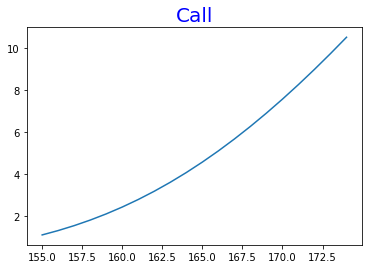

In [34]:
p1 = plt.plot(df.iloc[:,0]) 
plt.title('Call',fontsize=20, color = 'blue')

Text(0.5, 1.0, 'CallSpread')

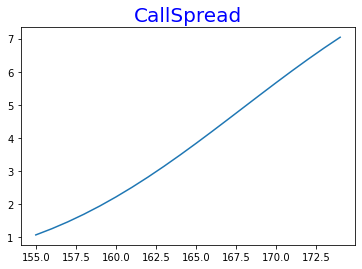

In [35]:
p2 = plt.plot(df.iloc[:,1]) 
plt.title('CallSpread',fontsize=20, color = 'blue')

Text(0.5, 1.0, 'CoveredCall')

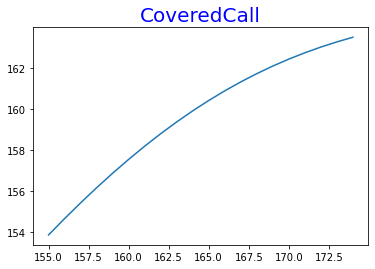

In [36]:
p3 = plt.plot(df.iloc[:,2]) 
plt.title('CoveredCall',fontsize=20, color = 'blue')

Text(0.5, 1.0, 'ProtectedPut')

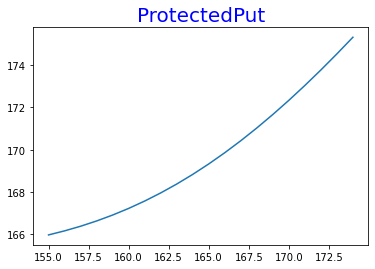

In [37]:
p4 = plt.plot(df.iloc[:,3]) 
plt.title('ProtectedPut',fontsize=20, color = 'blue')

Text(0.5, 1.0, 'Put')

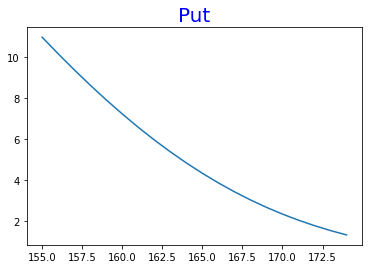

In [38]:
p5 = plt.plot(df.iloc[:,4]) 
plt.title('Put',fontsize=20, color = 'blue')

Text(0.5, 1.0, 'PutSpread')

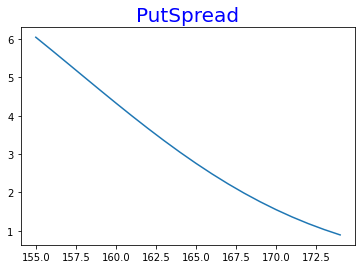

In [39]:
p6 = plt.plot(df.iloc[:,5]) 
plt.title('PutSpread',fontsize=20, color = 'blue')

Text(0.5, 1.0, 'Stock')

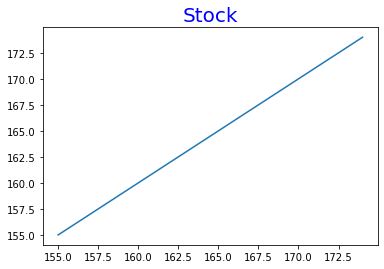

In [40]:
p7 = plt.plot(df.iloc[:,6]) 
plt.title('Stock',fontsize=20, color = 'blue')

Text(0.5, 1.0, 'Straddle')

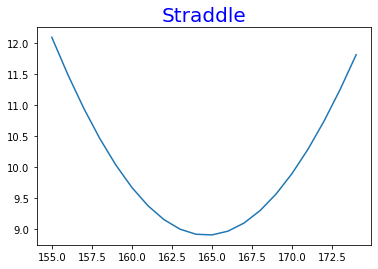

In [41]:
p8 = plt.plot(df.iloc[:,7]) 
plt.title('Straddle',fontsize=20, color = 'blue')

Text(0.5, 1.0, 'SynLong')

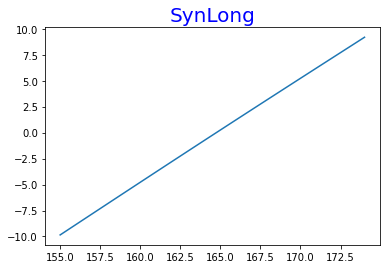

In [42]:
p9 = plt.plot(df.iloc[:,8]) 
plt.title('SynLong',fontsize=20, color = 'blue')

In [43]:
returns = pd.read_csv('DailyReturn.csv')
returns

,Unnamed: 0,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,2021/10/21,0.002608,0.001474,0.010897,0.005842,0.032571,0.000825,0.002566,0.003228,0.026648,...,-0.000329,-0.002156,-0.004130,0.010683,0.001944,0.005416,0.009789,0.012832,-0.004696,0.012841
1,2021/10/22,-0.001036,-0.005285,-0.005149,-0.028955,0.017539,-0.030443,-0.029104,-0.050515,0.001498,...,0.015748,0.005984,-0.000207,-0.002181,0.003732,0.003913,-0.002568,-0.010957,0.013526,-0.008040
2,2021/10/25,0.005363,-0.000336,-0.003332,-0.004551,0.126616,-0.000869,0.001068,0.012569,0.019361,...,0.002221,-0.002974,-0.005599,0.011770,0.006395,0.004618,-0.009720,-0.000173,0.002017,0.017145
3,2021/10/26,0.000900,0.004575,0.006426,0.016775,-0.006274,0.013543,0.006478,-0.039186,0.066952,...,-0.002263,0.008121,0.003337,-0.003545,0.000887,-0.118035,0.000476,-0.006752,-0.002013,0.001073
4,2021/10/27,-0.004430,-0.003148,0.042114,0.004864,0.019078,0.049595,0.048367,-0.011368,-0.010762,...,-0.014625,-0.007233,-0.012679,-0.052368,-0.014174,-0.002922,-0.017132,-0.054210,-0.022191,-0.011786
5,2021/10/28,0.009649,0.024992,0.003651,0.015941,0.037751,-0.002520,-0.002039,0.015054,0.020040,...,0.000658,0.009273,-0.061474,0.011733,0.008537,0.001360,-0.000223,-0.000369,0.013966,0.009913
6,2021/10/29,0.002029,-0.018156,0.022414,-0.021511,0.034316,0.015064,0.014655,0.020983,0.025099,...,-0.009481,-0.003445,-0.010543,0.005972,-0.036531,0.002806,-0.008829,0.003503,-0.006574,0.004448
7,2021/11/1,0.001720,-0.005607,-0.006785,-0.016107,0.084910,-0.030727,-0.030326,0.019810,0.010169,...,-0.001848,0.002799,-0.001360,0.008646,0.011714,-0.004183,0.008757,0.019475,0.015125,0.017713
8,2021/11/2,0.004043,0.007116,0.011416,-0.001615,-0.030275,0.013488,0.014530,-0.005758,0.022225,...,-0.002564,0.007388,0.002270,0.016858,0.003961,-0.013961,0.015835,0.001802,-0.002018,0.010053
9,2021/11/3,0.006105,0.009799,0.002611,0.021508,0.035717,0.008014,0.006355,0.010790,0.007462,...,0.012375,0.015971,0.018347,0.004833,0.022914,0.015445,-0.002898,0.007375,0.013064,0.016488


In [44]:
## Set return mean to 0
AAPL_R = pd.DataFrame(returns.loc[:, 'AAPL'])
AAPL_R = AAPL_R - AAPL_R.mean()

In [45]:
## fit normal distribution and Simulate
mean = 0
std = AAPL_R.std()
n = 10
sim = np.random.normal(mean, std, n)
sim

array([ 0.02315054, -0.01131442,  0.02514217,  0.00238576, -0.03376851,
        0.01301943,  0.02508157, -0.01459659,  0.01127237, -0.00140304])

In [46]:
## Calculate simulation price
p = 164.85
price = []
for r in np.nditer(sim): 
    p = (1+r)*p
    price.append(p)

In [47]:
current=[]
n = list(range(1,11))
days = np.repeat(n,15)
for i in days:
    dateNow = pd.Timestamp('2022-2-25') + pd.DateOffset(i)
    current.append(dateNow)
current

[Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-27 00:00:00'),
 Timestamp('2022-02-27 00:00:00'),
 Timestamp('2022-02-27 00:00:00'),
 Timestamp('2022-02-27 00:00:00'),
 Timestamp('2022-02-27 00:00:00'),
 Timestamp('2022-02-27 00:00:00'),
 Timestamp('2022-02-27 00:00:00'),
 Timestamp('2022-02-27 00:00:00'),
 Timestamp('2022-02-27 00:00:00'),
 Timestamp('2022-02-27 00:00:00'),
 Timestamp('2022-02-27 00:00:00'),
 Timestamp('2022-02-27 00:00:00'),
 Timestamp('2022-02-27 00:00:00'),
 Timestamp('2022-02-

In [48]:
df3['ExpirationDate'] = pd.to_datetime(df3['ExpirationDate'])
RF = 0.0025
CCR = 0.0053
b = RF - CCR
Value=[]
nrows = len(df3.index)
i = 0
for S in price:
    for i in range(0, nrows):
        strike_price = df3.iloc[i][6]
        current_price = df3.iloc[i][7]
        option_type = df3.iloc[i][4]
        TYPE = df3.iloc[i][1]
        T = (df3['ExpirationDate'][i]-current[i]).days/365
        if TYPE == 'Stock':
            Value.append(S)
        else:
            ivol = df3.iloc[i][8]
            Value.append(gbsm1(option_type, S, strike_price, T, RF, b, ivol))

In [49]:
pnl = pd.DataFrame()
pnl['Portfolio'] = df3['Portfolio']
pnl['Current Value'] = df3['CurrentPrice'] * df3['Holding']
pnl['1D Value'] = Value[:15]
pnl['2D Value'] = Value[15:30]
pnl['3D Value'] = Value[30:45]
pnl['4D Value'] = Value[45:60]
pnl['5D Value'] = Value[60:75]
pnl['6D Value'] = Value[75:90]
pnl['7D Value'] = Value[90:105]
pnl['8D Value'] = Value[105:120]
pnl['9D Value'] = Value[120:135]
pnl['10D Value'] = Value[135:150]

In [50]:
pnl['1D PnL'] = Value[:15] - pnl['Current Value']
pnl['2D PnL'] = Value[15:30] - pnl['Current Value']
pnl['3D PnL'] = Value[30:45] - pnl['Current Value']
pnl['4D PnL'] = Value[45:60] - pnl['Current Value']
pnl['5D PnL'] = Value[60:75] - pnl['Current Value']
pnl['6D PnL'] = Value[75:90] - pnl['Current Value']
pnl['7D PnL'] = Value[90:105] - pnl['Current Value']
pnl['8D PnL'] = Value[105:120] - pnl['Current Value']
pnl['9D PnL'] = Value[120:135] - pnl['Current Value']
pnl['10D PnL'] = Value[135:150] - pnl['Current Value']
pnl

,Portfolio,Current Value,1D Value,2D Value,3D Value,4D Value,5D Value,6D Value,7D Value,8D Value,...,1D PnL,2D PnL,3D PnL,4D PnL,5D PnL,6D PnL,7D PnL,8D PnL,9D PnL,10D PnL
0,Straddle,4.50,6.579705,5.422123,8.120455,8.412210,4.765604,5.994976,8.832385,7.073201,...,2.079705,0.922123,3.620455,3.912210,0.265604,1.494976,4.332385,2.573201,3.895029,3.722645
1,Straddle,4.40,2.681225,3.421850,1.958562,1.847016,3.948929,3.029303,1.697952,2.422214,...,-1.718775,-0.978150,-2.441438,-2.552984,-0.451071,-1.370697,-2.702048,-1.977786,-2.546604,-2.481297
2,SynLong,4.50,6.579705,5.422123,8.120455,8.412210,4.765604,5.994976,8.832385,7.073201,...,2.079705,0.922123,3.620455,3.912210,0.265604,1.494976,4.332385,2.573201,3.895029,3.722645
3,SynLong,-4.40,2.681225,3.421850,1.958562,1.847016,3.948929,3.029303,1.697952,2.422214,...,7.081225,7.821850,6.358562,6.247016,8.348929,7.429303,6.097952,6.822214,6.253396,6.318703
4,CallSpread,4.50,6.579705,5.422123,8.120455,8.412210,4.765604,5.994976,8.832385,7.073201,...,2.079705,0.922123,3.620455,3.912210,0.265604,1.494976,4.332385,2.573201,3.895029,3.722645
5,CallSpread,-0.72,1.431645,0.994859,2.121839,2.265885,0.779880,1.201962,2.480525,1.639523,...,2.151645,1.714859,2.841839,2.985885,1.499880,1.921962,3.200525,2.359523,2.977288,2.891822
6,PutSpread,4.40,2.681225,3.421850,1.958562,1.847016,3.948929,3.029303,1.697952,2.422214,...,-1.718775,-0.978150,-2.441438,-2.552984,-0.451071,-1.370697,-2.702048,-1.977786,-2.546604,-2.481297
7,PutSpread,-1.60,0.881808,1.161127,0.624095,0.585654,1.369064,1.011193,0.534852,0.787731,...,2.481808,2.761127,2.224095,2.185654,2.969064,2.611193,2.134852,2.387731,2.187842,2.210317
8,Stock,164.85,168.666367,166.758006,170.950664,171.358511,165.571990,167.727643,171.934516,169.424859,...,3.816367,1.908006,6.100664,6.508511,0.721990,2.877643,7.084516,4.574859,6.484679,6.244289
9,Call,4.50,6.579705,5.422123,8.120455,8.412210,4.765604,5.994976,8.832385,7.073201,...,2.079705,0.922123,3.620455,3.912210,0.265604,1.494976,4.332385,2.573201,3.895029,3.722645


In [51]:
OUT = pnl.groupby('Portfolio').sum().T.iloc[11::]

In [52]:
SUM = pd.DataFrame(OUT.mean(), columns=['PnL Mean'])
SUM

,PnL Mean
Portfolio,
Call,2.681833
CallSpread,5.136356
CoveredCall,16.313986
ProtectedPut,2.710068
Put,-1.922085
PutSpread,0.493284
Stock,4.632152
Straddle,0.759749
SynLong,9.559749


In [53]:
#VaR and Expected Shortfall
import math
def VaR_ES(x,alpha=0.05):
    xs = np.sort(x)
    n = alpha*xs.shape[0]
    iup = int(math.ceil(n))
    idn = int(math.floor(n))
    VaR = (xs[iup] + xs[idn])/2
    if idn == 0:
        ES = xs[0]
    else:
        ES = (xs[0:idn]).mean()
    return -VaR, -ES

In [54]:
VaR = []
ES = []
for column in OUT:
    VaR.append(VaR_ES(OUT[column])[0])
    ES.append(VaR_ES(OUT[column])[1])
print(VaR)
print(ES)

[-0.5938633683994041, -2.2012326037265018, -10.908861192280618, -0.6003876154218712, 2.6275155740474307, 0.4672625498264096, -1.314997823881214, 0.12074684005993852, -8.679253159940062]
[-0.2656036033624929, -1.7654832456453466, -9.98759358642819, -0.2709194121524856, 2.7020475849872145, 0.5671951562600088, -0.7219899830656971, 0.18546696755071856, -8.614533032449282]


In [55]:
SUM['5% VaR'] = VaR
SUM['5% ES'] = ES
SUM

,PnL Mean,5% VaR,5% ES
Portfolio,,,
Call,2.681833,-0.593863,-0.265604
CallSpread,5.136356,-2.201233,-1.765483
CoveredCall,16.313986,-10.908861,-9.987594
ProtectedPut,2.710068,-0.600388,-0.270919
Put,-1.922085,2.627516,2.702048
PutSpread,0.493284,0.467263,0.567195
Stock,4.632152,-1.314998,-0.721990
Straddle,0.759749,0.120747,0.185467
SynLong,9.559749,-8.679253,-8.614533
